# Работа с текстовыми файлами
## Используем функцию read_table()
→ Вы уже работали с текстовыми файлами, данные в которых представлены в табличной форме. Это файлы CSV. 

Также вам известно, что, указав определенные значения параметров функции read_csv(), можно считать данные из файла, в котором используется разделитель данных, отличный от запятой (sep), вместо десятичной точки используется другой символ (decimal), а также при считывании должно быть пропущено некоторое количество строк (skiprows). 

Такие данные обычно хранятся в текстовых файлах с расширением TXT. Этот тип файлов — источник данных, который легко расшифровывать и интерпретировать. Для чтения данных из файлов такого типа Pandas, помимо функции read_csv(), предлагает и функцию read_table().

Функция read_csv(), как вы уже знаете, загружает данные с разделителями из файла, URL-адреса, и в качестве разделителя по умолчанию используется запятая (символ). В документации эта функция описана как «Чтение данных из файла значений, разделённых запятыми (CSV), в DataFrame».
Функция read_table() также загружает данные с разделителями из файла, URL-адреса, но в качестве разделителя по умолчанию используется символ табуляции ('\t'). В документации эта функция описана как «Чтение данных из файла значений с разделителями в DataFrame».
Данные функции используются похожим образом, и то, что в настоящий момент поддерживаются они обе, обусловлено тем, что многие пользователи продолжают использовать функцию read_table(). Так, например, поиск на GitHub даёт более пятидесяти тысяч результатов по запросу "pd.read_table".

Для демонстрации использования функции read_table() выполним следующее: 

используя  функцию read_csv(), считаем данные из файла countries.csv в переменную countries_data, создав объект DataFrame;
используя уже знакомую функцию to_csv(), выгрузим этот DataFrame в файл countries.txt (с расширением TXT), который сохраним в папке data. В качестве разделителя используется символ пробела (" ").
Файл countries.csv ранее был вами сохранен в папке data. Папка создавалась при изучении материалов модуля PYTHON-10. Работа с различными источниками данных в Pandas. Если вы потеряли эти данные, скачайте файл по ссылке и сохраните в папке data.

- Импорт библиотеки pandas — при выполнении последовательно всех примеров ниже
- импорт выполняется один раз
import pandas as pd 
- Загружаем данные из файла в переменную, создавая объект DataFrame
countries_data = pd.read_csv('data/countries.csv', sep=';') 
-Выгружаем данные из DataFrame в CSV-файл и сохраняем файл в папке data
countries_data.to_csv('data/countries.txt', index=False, sep=' ')
Считаем данные из файла countries.txt в переменную txt_df  (объект DataFrame), применив функцию read_table() с параметрами sep=' '  и  index_col=['country'] (так мы избавимся от столбца с индексом и присвоим названия строкам, используя данные одного из столбцов). Выводим на экран полученный результат:

-Загружаем данные из файла в переменную, создавая объект DataFrame
txt_df = pd.read_table('data/countries.txt', sep=' ', index_col=['country'])
-Выводим содержимое DataFrame на экран
display(txt_df)
### Применение параметра header
Используя параметр header, при создании DataFrame мы учитываем наличие/отсутствие строки заголовков в исходном файле данных.

Например, если при считывании данных из ранее сохранённого в папке data файла melb_data_ps.csv указать значение параметра header=None, то первая строка исходного файла не будет восприниматься как строка заголовка и будет отнесена к области данных DataFrame:

- Загружаем данные из файла в переменную, создавая объект DataFrame
melb_data = pd.read_csv('data/melb_data_ps.csv', header=None) 
- Выводим содержимое DataFrame на экран
display(melb_data)
### Решаем проблему с кодировкой исходных данных
При считывании файла и создании DataFrame может возникнуть проблема — при выводе на экран данные будут отображаться в виде нечитаемых символов. Это связано с кодировкой символов в исходном файле.


Для решения проблемы выполним следующие действия:

узнаем, какая кодировка символов используется в считываемом файле, для этого обратимся к субмодулю chardet.universaldetector библиотеки Universal Encoding Detector. Модуль необходимо предварительно установить с помощью стандартной команды менеджера пакетов pip: pip install chardet;
при считывании файла и создании DataFrame будем использовать параметр encoding  —  указывает, какой тип кодировки символов используется в считываемом файле. 
- Считываем данные из файла с неизвестной кодировкой в переменную, создавая объект DataFrame
data=pd.read_csv('data/ErrorEnCoding.csv', header=None, encoding_errors='replace') 
- Выводим содержимое DataFrame на экран
display(data)
Выявлена проблема: при стандартном считывании содержимое файла читается некорректно. Необходимо указать кодировку файла при считывании.

Определяем кодировку файла

Приведённый ниже код поможет нам определить используемую кодировку в файле, степень достоверности, используемый язык.

- Импортируем субмодуль chardet.universal
from chardet.universaldetector import UniversalDetector

detector = UniversalDetector()

with open('data/ErrorEnCoding.csv', 'rb') as fh:
    for line in fh:
        detector.feed(line)
        if detector.done:
            break
print(detector.close())
###  Чтение файла по ссылке, используя функцию read_table()
Ранее вы уже считывали данные из файла melb_data.csv, который находится в свободном доступе в интернете, используя функцию read_csv(). Попробуем использовать функцию read_table(), указав в качестве разделителя данных запятую — ','.

data = pd.read_table('https://raw.githubusercontent.com/esabunor/MLWorkspace/master/melb_data.csv', sep=',')
display(data)
Как видим, функция read_table() сработала и с CSV-файлом — достаточно было указать, какой разделитель используется.
## Немного оБ EXCEL
→ Excel-файлы представляют из себя таблицы с данными и имеют формат XLS или  XLSX. В отличие от CSV-файлов, которые также позволяют удобно представлять табличные данные, XLS- и XLSX-файлы могут помимо данных включать формулы, изображения, графики и содержат информацию о форматировании.
Файл Excel называется рабочей книгой. Каждая книга может хранить некоторое количество листов. Лист, просматриваемый пользователем в данный момент, называется активным. Лист состоит из столбцов (адресуемых, как правило, с помощью букв, начиная с A) и строк (адресуемых с помощью цифр, начиная с 1). Лист может содержать данные в виде таблиц, формул, изображений, графиков и информации о форматировании.

XLS- и XLSX не являются текстовыми файлами. Вы наверняка хотя бы раз в жизни сталкивались с таблицами Excel, и, скорее всего, работали с ними в Microsoft Office, Open Office (бесплатный аналог Microsoft Office) или онлайн, используя Google Таблицы. Давайте научимся делать это с помощью pandas.

В этом разделе будут рассмотрены функции read_excel() и to_excel() из библиотеки pandas. С их помощью можно считывать данные из файлов Excel и выполнять запись в них. С помощью различных параметров есть возможность менять поведение функций, создавая нужные файлы, а не просто копируя содержимое из объекта DataFrame.
### Считывание данных из файла Excel
Подобно уже хорошо нам известной функции read_csv(), в pandas предусмотрена функция для удобного чтения XLS- и XLSX- файлов: read_excel() (англ. читать_Excel). Синтаксис обеих функций практически идентичен.

✍️ Для примера попробуем открыть файл grades.xlsx, содержащий оценки студентов за прослушанные курсы. Скачайте его и скопируйте в папку data. Для чтения файла предварительно потребуется установить библиотеку openpyxl через команду pip install openpyxl.

Попробуем прочитать наш файл-пример. Для этого передадим в read_excel() путь к нему. Чтобы его открыть и сохранить данные в переменную grades, необходимо выполнить следующий код:
grades = pd.read_excel('data/grades.xlsx')
display(grades.head())
### Считывание данных из файла EXCEL по ссылке
Если файл находится в открытом доступе по ссылке (например, на Google Диске или GitHub), его можно прочитать и из интернета — для этого достаточно в функции read_excel() вместо пути до файла указать ссылку на файл. Например:

data = pd.read_excel('https://github.com/asaydn/test/raw/master/january.xlsx', skiprows=3)
display(data)
Основные параметры метода read_excel()

* io — первый параметр, в который мы передаём адрес файла, который хотим прочитать. Кроме адреса на диске, можно передавать адрес в интернете.
* sheet_name —  ссылка на лист в Excel-файле (возможные значения данного параметра: 0 — значение по умолчанию, загружается первый лист; 'Sheet1' — можно передать название листа; обычно листы называются 'SheetX', где X — номер листа, но могут использоваться и другие названия; [0, 1, 'Sheet3'] — список, содержащий номера или названия листов; в таком случае Pandas вернёт словарь, в котором ключами будут номера или названия листов, а значениями — их содержимое в виде DataFrame; None — если передать такое значение, то pandas прочитает все листы и вернёт их в виде словаря, как в предыдущем пункте).
* na_values — список значений, которые будут считаться пропусками ( ‘’, ‘#N/A’, ‘ N/A’, ‘#NA’, ‘-1.#IND’, ‘-1.#QNAN’, ‘-NaN’, ‘-nan’, ‘1.#IND’, ‘1.#QNAN’, ‘NA’, ‘NULL’, ‘NaN’, ‘n/a’, ‘nan’, ‘null’).
Следует также учесть, что нормальное поведение pandas — это считывание значений (формулы из Excel-файла не считываются).

Как упоминалось выше, один Excel-файл может включать в себя несколько листов, которые отображаются в разных вкладках (англ. sheet, рус. лист). Например, в нашем файле два листа — Maths и ML.

По умолчанию в DataFrame читается информация из первого листа, однако read_excel()  позволяет выбрать, из какого именно листа загружать данные. Сделать это можно с помощью параметра sheet_name (рус. имя_листа). Например, чтобы прочесть данные из второго листа (ML) файла, выполним код:

grades = pd.read_excel('data/grades.xlsx', sheet_name='ML')
display(grades.head())
### Выгрузка данных из DataFrame в Excel-файл
После обработки данных (очистка, создание новых признаков и т.д.) методами и функциями pandas мы сталкиваемся с обратной задачей — сохранить данные из DataFrame в Excel-файл.

Для этого в pandas есть функция to_excel() (рус. в_Excel), принцип работы которой очень схож с функцией to_csv():

- Сохраняем данные из DataFrame grades в файл grades_new.xlsx в папке data
grades.to_excel('data/grades_new.xlsx')
В этом случае будет создан один лист с именем по умолчанию "Sheet1". Также мы сохраним и индекс — в данных будет находиться лишний столбец. Чтобы создать лист с определённым именем (например, Example) и не сохранять индекс, в метод  to_excel() необходимо передать параметры sheet_name='Example' и index=False:

- Сохраняем данные из DataFrame grades в файл grades_new.xlsx (на листе 'Example') в папке data
grades.to_excel('data/grades_new.xlsx', sheet_name='Example', index=False)
Продвинутая работа с файлами Excel в Python предполагает использование дополнительных библиотек, таких как:

* openpyxl — рекомендуемый пакет для чтения и записи файлов Excel 2010+ (например, xlsx);
* xlsxwriter — альтернативный пакет для записи данных, информации о форматировании и, в частности, диаграмм в формате Excel 2010+ (например, xlsx);
* pyxlsb — пакет позволяет читать файлы Excel в xlsb-формате;
* pylightxl — пакет позволяет читать xlsx- и xlsm-файлы и записывать xlsx-файлы;
* xlrd — пакет предназначен для чтения данных и информации о форматировании из старых файлов Excel (например, xls);
* xlwt — пакет предназначен для записи данных и информации о форматировании в старые файлы Excel (например, xls).
## JSON
→ JSON — это простой, структурированный формат обмена данными, основанный на использовании текста.

Под обменом данных в этом контексте чаще всего подразумевается передача данных по компьютерным сетям, например, пересылка данных от сервера к браузеру.

Аббревиатура JSON расшифровывается как JavaScript Object Notation, в переводе на русский — система обозначения/записи объектов JavaScript. Несмотря на то, что JSON изначально основывался на языке программирования JavaScript, он является общепризнанным форматом обмена данными, и многие языки программирования, включая Python, содержат эффективные инструменты для работы с ним.

Если вы планируете использовать в своей работе информацию, которая автоматически загружается из каких-либо веб-служб, то умение работать с форматом JSON — это критически важный навык, который обязательно необходимо приобрести.

Именно этим мы сейчас и займёмся!

Итак, JSON — это простой, структурированный, основанный на использовании текста формат обмена данными.
### Модули для работы с JSON
Для работы с данными в формате JSON используется модуль json из стандартной библиотеки языка Python, который необходимо будет загрузить перед началом работы с данными, выполнив следующую команду:

- Импортируем модуль json
import json
Также нам может быть полезен модуль pprint  (от англ. pretty print, рус. красивый вывод на экран), а точнее — встроенная в него одноимённая функция pprint(), с помощью которой можно красиво выводить на экран содержимое JSON-файла. Для загрузки нужной нам функции перед началом работы выполним следующий код:

- Импортируем функцию pprint()
from pprint import pprint
### КАК ВЫГЛЯДИТ JSON-ФАЙЛ?
Информация в формате JSON представляет собой (в закодированном виде) одну из двух структур:

набор пар "ключ-значение", где ключ — это всегда строковая величина (в Python такая структура преобразуется в словарь);
упорядоченный набор значений (при чтении JSON-файла в Python эта структура будет преобразована в список).
Формат JSON допускает неограниченное количество вложений этих структур друг в друга.

Давайте на примере посмотрим, что это означает. Все упражнения раздела мы будем выполнять на примере файла, содержащего информацию об ингредиентах блюд, относящихся к кухням разных народов.
→ Чтобы перевести данные из формата JSON в формат, который можно обрабатывать инструментами Python, необходимо выполнить процедуру, которая называется десериализация (декодирование данных). Обратный процесс, связанный с переводом структур данных Python в формат JSON, называется сериализацией.

Для выполнения десериализации мы воспользуемся методом load() (от англ. загрузить) модуля json, который принимает на вход ссылку на открытый JSON-файл:

- Открываем файл и связываем его с объектом "f"
with open('recipes.json') as f:  
    # Загружаем содержимое открытого файла в переменную recipes  
    recipes = json.load(f)
Отлично! Теперь содержимое нашего файла загружено в переменную recipes. Давайте выведем его на экран с помощью функции pprint() из одноимённого модуля:

- Выводим на экран содержимое переменной recipes, используя функцию pprint()
pprint(recipes)
# ИЗ JSON В PANDAS
→ Как вы помните, после десериализации наши данные были преобразованы в список, элементами которого являются вложенные словари, содержащие по три пары "ключ-значение". 
Поскольку структура всех вложенных словарей одинакова, мы можем создать DataFrame на основе списка, не проводя с ним никаких дополнительных манипуляций:

- Импортируем модуль json
import json 
- Импортируем функцию pprint()
from pprint import pprint 
- Импортируем модуль pandas
import pandas as pd 
- Открываем файл и связываем его с объектом "f"
with open('recipes.json') as f: 
    # Загружаем содержимое открытого файла в переменную recipes
    recipes = json.load(f) 
- Создаём объект DataFrame из списка recipes
df = pd.DataFrame(recipes) 
- Выводим на экран первые строки полученного DataFrame
display(df.head())
## СОХРАНЯЕМ DATAFRAME В CSV-ФАЙЛЕ
Если мы планируем продолжать работать с DataFrame, созданными на основе данных, которые мы получили в JSON-формате, то полезно будет сохранить промежуточный DataFrame в виде CSV-файла. Для выполнения этой операции воспользуемся известной нам в Pandas функцией to_csv():

df.to_csv('recipes.csv', index = False)
В качестве основного параметра мы указали имя файла, в котором необходимо сохранить данные. Также мы установили значение параметра index как False. Такая настройка позволит нам не сохранять индексы строк в виде отдельного столбца; в результате не будут загружаться «лишние» данные при открытии файла при помощи функции read_csv().
## ИЗ PANDAS В JSON
→ Решим обратную задачу и создадим JSON-файл из сохранённого ранее CSV-файла, который получили в конце предыдущего этапа. 

Начнём с чтения файла и создания DataFrame на его основе:

- Создаём DataFrame, читаем данные из файла в переменную df
df = pd.read_csv('recipes.csv')
Теперь, используя только данные из этого файла, нам нужно в точности воссоздать структуру исходного JSON-файла. Мы помним, что после десериализации данные представляли собой список, состоящий из словарей. В каждом словаре хранилась информация о рецепте одного блюда. Каждый словарь состоял из трёх пар "ключ-значение". Первая пара содержала название кухни, к которой относилось блюдо, вторая — id блюда, и третья — список ингредиентов, входящих в состав блюда.
# XML. Что это?
→ Аббревиатура XML расшифровывается как eXtensible Markup Language — расширяемый язык разметки. Он (язык) позволяет описывать документы, используя теги.

Если вы когда-нибудь сталкивались с HTML, языком разметки для создания веб-страниц, то можете заметить, что XML очень похож на него. Однако в отличие от HTML, где теги заранее чётко заданы, в XML мы можем задавать теги сами.

Например, если мы хотим описать меню в ресторане в формате XML-документа, мы можем сделать это так: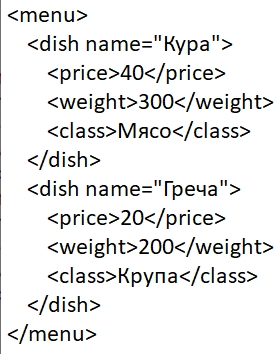

В примере выше довольно жёсткая структура: у нас есть меню  — тег <menu>, где хранятся объекты, то есть конкретные блюда, помеченные тегом <dish>. У каждого из блюд есть параметр name, в котором прописано имя блюда. Можно считать, что <dish> — класс этого объекта.

Внутри каждого объекта-блюда находится набор значений, которые тоже задаются тегами. Например, внутри тега <price> находится значение 20, означающее цену данного блюда. Тег <price> и другие теги внутри можно рассматривать как атрибуты класса dish.

Файлы XML не всегда имеют жёсткую структуру и не обязаны её иметь, но чаще всего какая-то структура внутри файла будет. Почему? Потому что обычно XML не пишут вручную. Такие файлы генерируются кодом и читаются тоже кодом. Поэтому при наличии понятной структуры обработка файла становится намного проще.
## Извлекаем контент из XML-файла
Данные в формате XML имеют древовидную структуру. 

Что такое дерево? Это структура, которая имеет узлы и связи между ними. Самый верхнеуровневый узел называется корнем, а всё, что находится в самом низу, называется листьями. 

В примере из прошлого юнита корнем является <menu>, а листьями, например, <price> и <weight>.

Кроме того, у <menu> есть дети (потомки) — это два узла <dish>, имеющие разное значение атрибута <name>.

Таким образом, в файле используется набор тегов, внутри которых могут находиться другие теги со своими значениями.

Для работы с XML-файлами мы будем использовать модуль ElementTree , входящий в стандартный пакет xml. Этот модуль позволит нам «перемещаться» по дереву XML и смотреть, что находится в каждом его узле, начиная с корня и заканчивая листьями.

Импортируем этот модуль под псевдонимом ET: 

- Импортируем модуль ElementTree
import xml.etree.ElementTree as ET
## Корень
Запишем в переменную root корневой узел дерева tree и посмотрим, как выглядит содержимое переменной root, для чего выполним код:

root = tree.getroot()
display(root)
Мы видим, что в корне находится 'menu'. Всё правильно, мы и предполагали увидеть именно это. 

Какой тип у этого объекта? Если мы вызовем встроенный в Python метод type() и передадим ему root , то увидим, что это тип xml.etree.ElementTree.Element. Такой тип будет у любого узла в дереве.

display(type(root))
## Потомки
Для того чтобы посмотреть список потомков корневого узла, выполним следующий код:

display(list(root))
## Атрибуты и теги
Как было сказано ранее, у узлов могут быть параметры или атрибуты. Например, у узлов dish есть атрибут name, который хранит название блюда.

Мы можем непосредственно обратиться к атрибутам, используя attrib.

Выведем на экран атрибуты первого блюда из меню:

display(root[0].attrib)


В XML-узлах часто хранятся количественные показатели. Эти показатели хранятся в виде текста, и прочитать их можно, обратившись к атрибуту text у соответствующего объекта типа ElementTree.Element.

Например, возьмём узел price первого блюда из меню:

display(root[0][0])


Теперь прочитаем значение этого узла с помощью text:

display(root[0][0].text)


Все значения в XML, даже числовые, хранятся как строки, поэтому преобразовывать их к нужному типу вам нужно самим.

Например, в данном случае можно обернуть значение стоимости в int() или float().

Если вы хотите прочитать наименование тега конкретного узла, необходимо использовать tag. Например, получим наименование тега корневого узла:

display(root.tag)
## Использование циклов
→ Итак, мы научились обращаться к отдельным узлам дерева, представляющего XML-структуру, и извлекать информацию о его атрибутах, значении и потомках.

На этом шаге мы решим задачу вывода на экран наименований всех блюд из меню, а также информацию о них (иными словами, нам необходимо обойти дерево и вывести на экран значения его листьев).

Используя цикл for, автоматизируем обход дерева. Для этого напишем следующий код:

for dish in root:
    for param in dish:
        print(dish.attrib['name'], param.tag, param.text)
    print()
## Загружаем данные из XML-файла в DataFrame
Покажем, как это сделать, на примере работы с нашим файлом-меню.

✍ Реализуем следующий алгоритм:

* Загрузить XML-структуру файла menu.xml в переменную root.
* Создать пустой список df_list (в него будем добавлять строчки итоговой таблицы).
* Заранее создать список column_names с именами столбцов — название блюда (name), его цена (price), вес (weight) и класс (class).
* В цикле организовать обход xml-дерева из корня по всем потомкам.
* На каждой итерации цикла сформировать в виде списка строку таблицы, содержащую информацию: наименование блюда (атрибут name узла dish) и значения потомков этого узла — узлов price, weight, class.
* Добавить сформированную строку в список df_list, используя метод append().
* Сформировать из вложенного списка DataFrame. Имена для столбцов взять из списка column_names.
import xml.etree.ElementTree as ET
tree = ET.parse('menu.xml')
root = tree.getroot()

import pandas as pd
column_names = ['name', 'price', 'weight', 'class']
df_list = []

for dish in root:
    row = [dish.attrib['name'], dish[0].text, dish[1].text, dish[2].text]
    df_list.append(row)

df = pd.DataFrame(df_list, columns=column_names)
display(df)
## Создаём XML-файл

→ Воссоздадим структуру нашего исходного XML-файла с нуля,  руководствуясь общими рекомендациями.

Чтобы создать корень дерева, используем метод Element() из класса ElementTree:

import xml.etree.ElementTree as ET

new_root = ET.Element('menu')
display(new_root)


Теперь мы можем добавлять новые узлы в наше дерево, используя метод SubElement() из того же класса.

Добавим в наше меню двух потомков корневого узла, которые будут представлять два блюда, то есть будут узлами dish:

dish1 = ET.SubElement(new_root, 'dish', name='Кура')

dish2 = ET.SubElement(new_root, 'dish', name='Греча')

display(list(new_root))


В метод SubElement() мы передали первым аргументом узел, к которому добавляем потомка, вторым аргументом — наименование нового тега (dish),  третьим аргументом — наименование атрибута нового узла( name ) и его значение.

Аналогичным образом можно добавлять новые узлы к любым существующим узлам, не только к корню.


Добавим в создаваемую структуру по три потомка (атрибута) к двум новым узлам, которые будут содержать информацию о блюде — о его цене (price), весе (weight) и классе (class), а также значение этих атрибутов:

price1 = ET.SubElement(dish1, "price").text = "40"
weight1 = ET.SubElement(dish1, "weight").text = "300"
class1 = ET.SubElement(dish1, "class").text = "Мясо"
display(list(dish1))

price2 = ET.SubElement(dish2, "price").text = "20"
weight2 = ET.SubElement(dish2, "weight").text = "200"
class2 = ET.SubElement(dish2, "class").text = "Крупа"
display(list(dish2))


Проверим визуально корректность созданной нами структуры, выполнив фрагмент кода, разработанного ранее:

for dish in new_root:    
    for param in dish:
        print(dish.attrib['name'], param.tag, param.text)
    print()
## Сохранение XML-файла
Преобразуем созданный нами объект типа ElementTree.Element в строку c помощью метода tostring(), передав наше новое дерево как аргумент. Сохраним эту строку на диске, используя стандартные средства Python:

new_root_string = ET.tostring(new_root)

with open("new_menu.xml", "wb") as f:
    f.write(new_root_string)
    ET.ElementTree(new_root).write('new_menu_good.xml', encoding="utf-8")